In [2]:
import tensorflow as tf
import numpy as np

(960, 960)


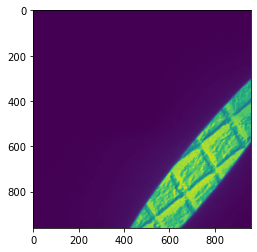

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("prediction/a (70).tiff")
train_img = mpimg.imread("train/ilumination_2/2018-08-30+11.48.27.910000.tiff")

plt = plt.imshow(img)
print(img.shape)

In [4]:
import os

folder_path = (r'./train/Generaly_hard/')

test = os.listdir(folder_path)

for images in test:
    if images.endswith(".png"):
        os.remove(os.path.join(folder_path, images))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

train = ImageDataGenerator(1/255)
validate = ImageDataGenerator(1/255)

train_data = train.flow_from_directory("./train/",
                                       target_size=(982, 982),
                                       batch_size=2,
                                       )

Found 59 images belonging to 7 classes.


C:\Users\Lukas\anaconda3\envs\MachineLearning\lib\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [6]:
validation_data = train.flow_from_directory("./validation/",
                                       target_size=(982, 982),
                                       batch_size=2,
                                       )

Found 19 images belonging to 7 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten

model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(982, 982, 3)),
    MaxPooling2D((2,2)),

    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2,2)),

    # dense
    Flatten(),
    Dense(64, activation="relu"),
    Dense(7, activation="softmax")
])

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

loss_fn = CategoricalCrossentropy()
model.compile(loss=loss_fn,
            optimizer="adam",
            metrics=["accuracy"])

In [9]:
model.fit(train_data,
          steps_per_epoch=4,
          epochs=25,
          validation_data=validation_data,
          )

C:\Users\Lukas\anaconda3\envs\MachineLearning\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/25
4/4 [==============================] - 12s 3s/step - loss: 1455.9742 - accuracy: 0.0000e+00 - val_loss: 1416.7375 - val_accuracy: 0.1579
Epoch 2/25
4/4 [==============================] - 8s 2s/step - loss: 502.3743 - accuracy: 0.2500 - val_loss: 226.4250 - val_accuracy: 0.1579
Epoch 3/25
4/4 [==============================] - 9s 2s/step - loss: 520.5179 - accuracy: 0.2857 - val_loss: 198.6611 - val_ac

In [10]:
test = ImageDataGenerator(1/255)
test_data = test.flow_from_directory("test", target_size=(982, 982), batch_size=2)


Found 57 images belonging to 7 classes.


In [11]:
model.evaluate(test_data)

29/29 [==============================] - 12s 417ms/step - loss: 3.9585 - accuracy: 0.2105

[3.9585132598876953, 0.21052631735801697]

In [12]:
from tensorflow.keras.preprocessing import image

path = "prediction/a (73).tiff"

p_img = image.load_img(path)
x = image.img_to_array(p_img)
x = np.expand_dims(x, axis=0)

stacked = np.vstack([x])

def predict(image):
    pred_val = model.predict(image)
    if (pred_val[0][np.argmax(pred_val)] <= 0.3):
        print("no match")
        print(pred_val)
    else:
        print(f"{np.argmax(pred_val)+1} <- cislo suboru s najväcsim % | hodnoty pre vsetky subory -> {pred_val}")

predict(stacked)

plt_img = mpimg.imread(path)
plt.imshow(plt_img)

no match
[[0.1129944  0.09845401 0.18843517 0.14734972 0.13453926 0.1445587
  0.17366883]]


AttributeError: 'AxesImage' object has no attribute 'imshow'

In [14]:
model.save("C:/Users/Lukas/Desktop/ard/MachineLearning/python/ElectronBeamAI/model/electronDetectAi.h5")